In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Titanic/Titanic-Dataset.csv')

# Display the first few rows of the dataset
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
# Check for missing values
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)

In [6]:
# Drop the Cabin column due to a high number of missing values
data.drop('Cabin', axis=1, inplace=True)

In [7]:
# Check for missing values
print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [8]:
# Feature engineering
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data['IsAlone'] = 1  # Initially considering all as alone
data['IsAlone'].loc[data['FamilySize'] > 1] = 0  # Updating those with family

<ipython-input-8-5492d717dfda>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['IsAlone'].loc[data['FamilySize'] > 1] = 0  # Updating those with family


In [9]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,4,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,1


In [10]:
data1 = data.copy()

In [11]:
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,4,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,1


In [12]:
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,4,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,1


In [14]:
# Drop columns that are not needed
data1.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

KeyError: "['PassengerId', 'Name', 'Ticket'] not found in axis"

In [15]:
data1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,male,22.0,1,0,7.2500,S,2,0
1,1,1,female,38.0,1,0,71.2833,C,2,0
2,1,3,female,26.0,0,0,7.9250,S,1,1
3,1,1,female,35.0,1,0,53.1000,S,2,0
4,0,3,male,35.0,0,0,8.0500,S,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1,1
887,1,1,female,19.0,0,0,30.0000,S,1,1
888,0,3,female,28.0,1,2,23.4500,S,4,0
889,1,1,male,26.0,0,0,30.0000,C,1,1


In [16]:
# Convert categorical variables to numeric
data1 = pd.get_dummies(data1, columns=['Sex', 'Embarked'])
data1

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,2,0,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,2,0,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,1,1,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,2,0,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,1,1,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,1,False,True,False,False,True
887,1,1,19.0,0,0,30.0000,1,1,True,False,False,False,True
888,0,3,28.0,1,2,23.4500,4,0,True,False,False,False,True
889,1,1,26.0,0,0,30.0000,1,1,False,True,True,False,False


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


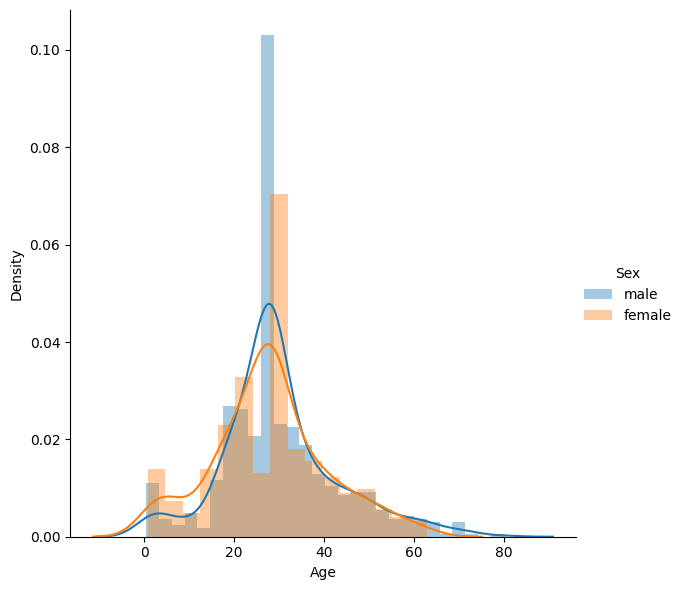

In [17]:
sns.FacetGrid(data, hue='Sex', height=6).map(sns.distplot, 'Age').add_legend()
plt.show()

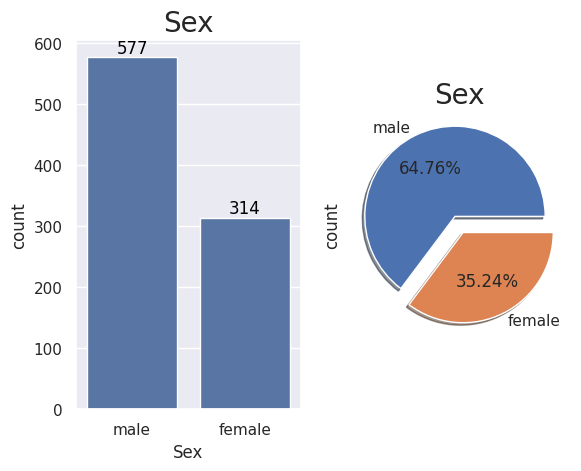

In [18]:
# Set Seaborn style
sns.set()

# Subplot 1 - Countplot
ax1 = plt.subplot(1, 2, 1)
sns.countplot(x='Sex', data=data)
ax1.bar_label(ax1.containers[0], fontsize=12, color="black")  # Add labels to the bars
plt.title("Sex", fontsize=20)

# Create a pie chart
ax = plt.subplot(1, 2, 2)
data['Sex'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.2f%%', shadow=True, ax=ax)
ax.set_title(label="Sex", fontsize=20)

# Show the plot
plt.show()

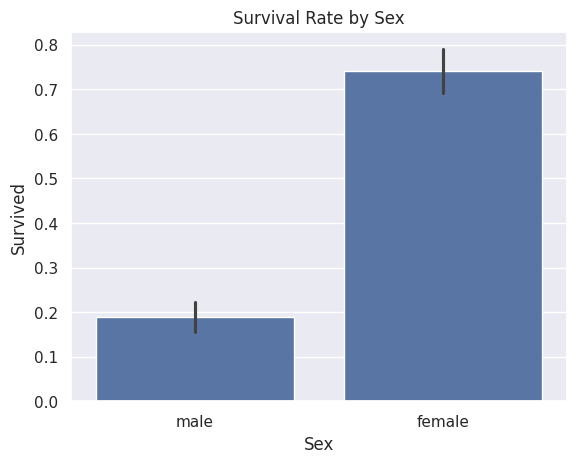

In [19]:
# Survival rate by Sex
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Sex')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


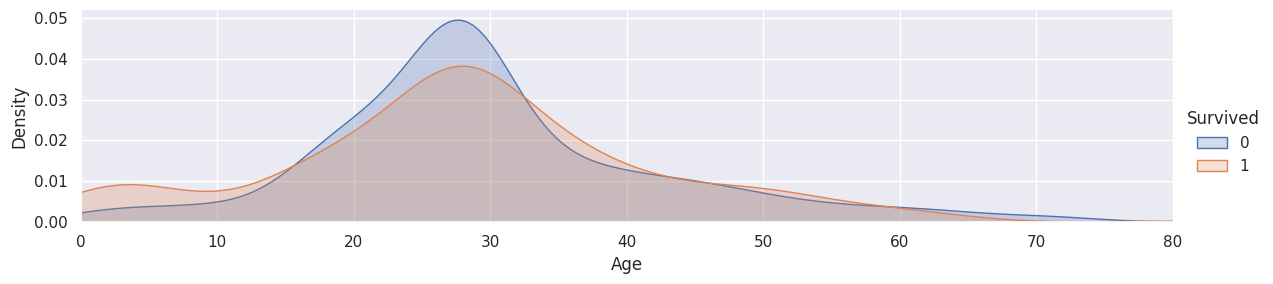

In [20]:
fig = sns.FacetGrid(data, hue="Survived", aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = data['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()
plt.show()

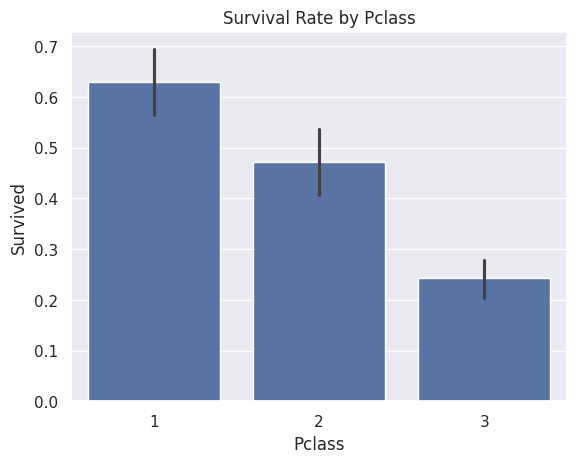

In [21]:
# Survival rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Pclass')
plt.show()

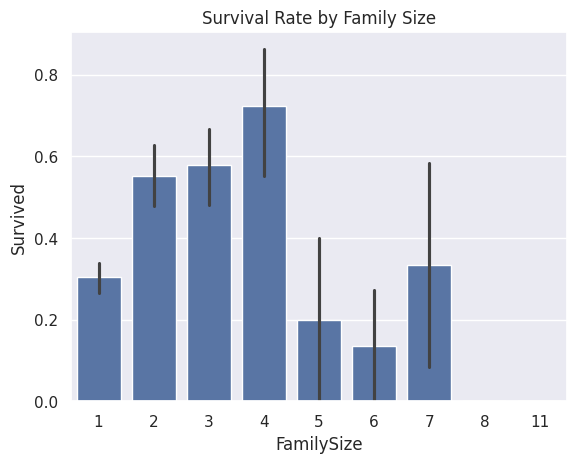

In [22]:
# Survival rate by FamilySize
sns.barplot(x='FamilySize', y='Survived', data=data1)
plt.title('Survival Rate by Family Size')
plt.show()

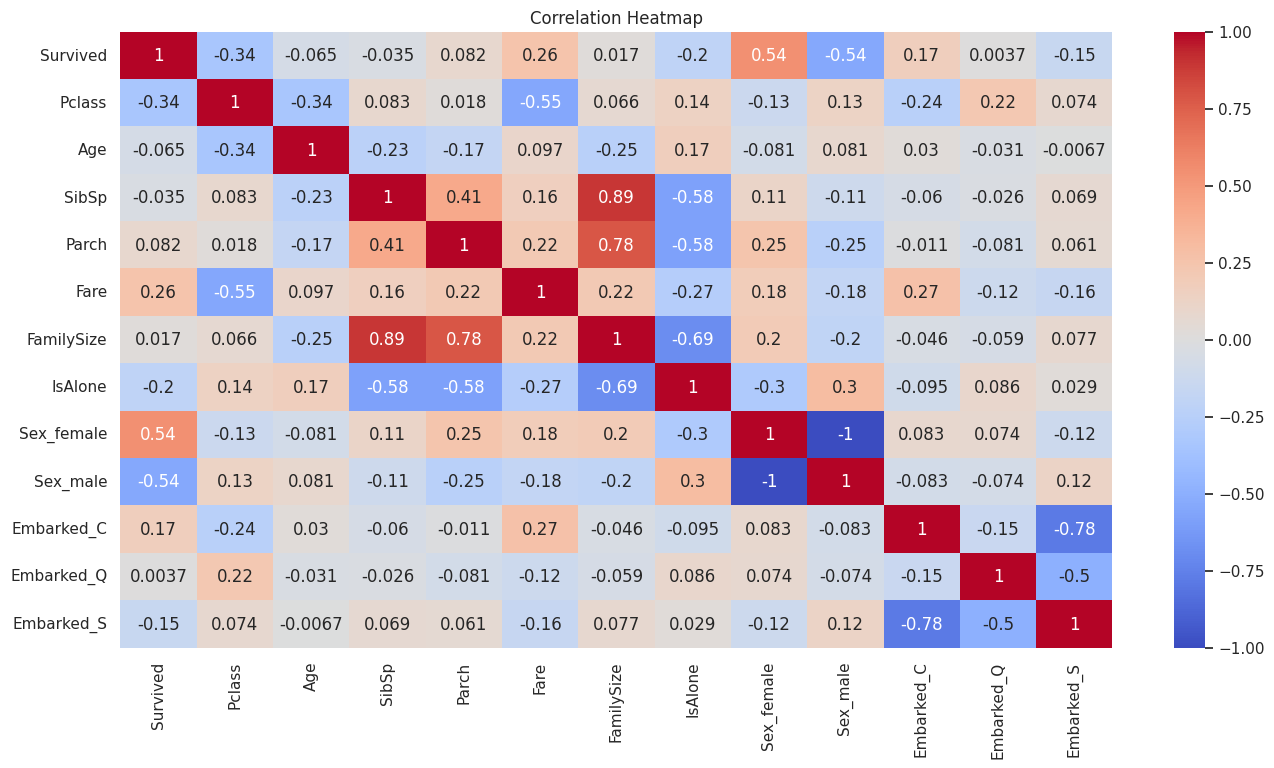

In [23]:
# Correlation heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(data1.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [24]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,4,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,1


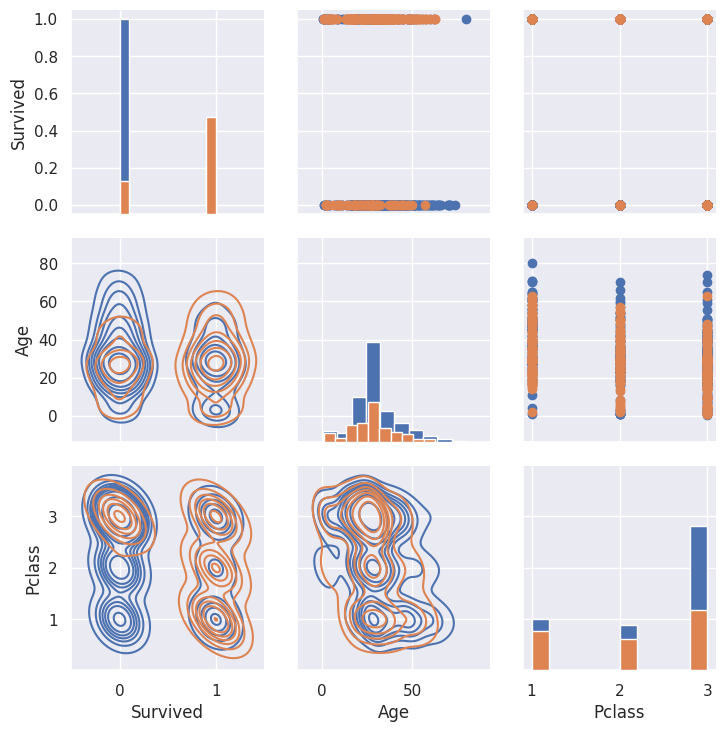

In [25]:
titanic_g = sns.PairGrid(data,hue='Sex',vars=['Survived','Age','Pclass'])
titanic_g.map_diag(plt.hist)
titanic_g.map_upper(plt.scatter)
titanic_g.map_lower(sns.kdeplot)
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, mean_absolute_error,
    mean_squared_error, roc_curve, roc_auc_score
)

In [27]:
# Define feature matrix and target vector
X = data1.drop('Survived', axis=1)
y = data1['Survived']

In [28]:
X

,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,2,0,False,True,False,False,True
1,1,38.0,1,0,71.2833,2,0,True,False,True,False,False
2,3,26.0,0,0,7.9250,1,1,True,False,False,False,True
3,1,35.0,1,0,53.1000,2,0,True,False,False,False,True
4,3,35.0,0,0,8.0500,1,1,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,1,False,True,False,False,True
887,1,19.0,0,0,30.0000,1,1,True,False,False,False,True
888,3,28.0,1,2,23.4500,4,0,True,False,False,False,True
889,1,26.0,0,0,30.0000,1,1,False,True,True,False,False


In [29]:
# Ensure correct data types
X['Sex_female'] = X['Sex_female'].astype(int)
X['Sex_male'] = X['Sex_male'].astype(int)
X['Embarked_C'] = X['Embarked_C'].astype(int)
X['Embarked_Q'] = X['Embarked_Q'].astype(int)
X['Embarked_S'] = X['Embarked_S'].astype(int)

In [30]:
X

,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,2,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,2,0,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,2,0,1,0,0,0,1
4,3,35.0,0,0,8.0500,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,1,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,1,1,0,0,0,1
888,3,28.0,1,2,23.4500,4,0,1,0,0,0,1
889,1,26.0,0,0,30.0000,1,1,0,1,1,0,0


In [31]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}


In [34]:

# Train models and evaluate performance
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_proba_test = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    results[name] = {
        'Training set score': model.score(X_train, y_train),
        'Test set score': model.score(X_test, y_test),
        'Accuracy Score': accuracy_score(y_test, y_pred_test),
        'Confusion Matrix': confusion_matrix(y_test, y_pred_test),
        'Classification Report': classification_report(y_test, y_pred_test),
        'MAE': mean_absolute_error(y_test, y_pred_test),
        'MSE': mean_squared_error(y_test, y_pred_test),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'ROC AUC': roc_auc_score(y_test, y_proba_test) if y_proba_test is not None else 'N/A',
        'ROC Curve': roc_curve(y_test, y_proba_test) if y_proba_test is not None else 'N/A',
        'Feature Importances': model.feature_importances_ if hasattr(model, 'feature_importances_') else
                             (model.coef_[0] if hasattr(model, 'coef_') else 'N/A')
    }

In [35]:

# Print results
for name, result in results.items():
    print(f"Model: {name}")
    for metric, value in result.items():
        if metric != 'ROC Curve':
            print(f"{metric}: {value}")
    print()


Model: Logistic Regression
Training set score: 0.800561797752809
Test set score: 0.7988826815642458
Accuracy Score: 0.7988826815642458
Confusion Matrix: [[89 16]
 [20 54]]
Classification Report:               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

MAE: 0.2011173184357542
MSE: 0.2011173184357542
RMSE: 0.4484610556511615
ROC AUC: 0.8877734877734879
Feature Importances: [-0.89551523 -0.0299244  -0.22089887 -0.02030288  0.00228404 -0.2403126
 -0.65171394  1.29919632 -1.29830717  0.14851829  0.05850719 -0.20613632]

Model: Random Forest
Training set score: 0.9789325842696629
Test set score: 0.8268156424581006
Accuracy Score: 0.8268156424581006
Confusion Matrix: [[90 15]
 [16 58]]
Classification Report:               preci

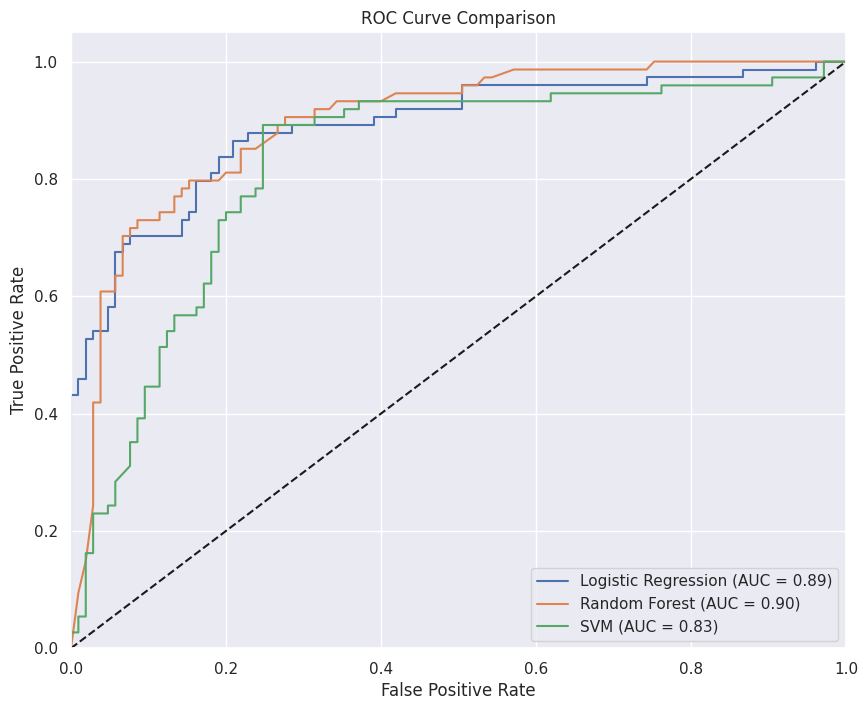

In [36]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
for name, result in results.items():
    fpr, tpr, _ = result['ROC Curve']
    plt.plot(fpr, tpr, label=f'{name} (AUC = {result["ROC AUC"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

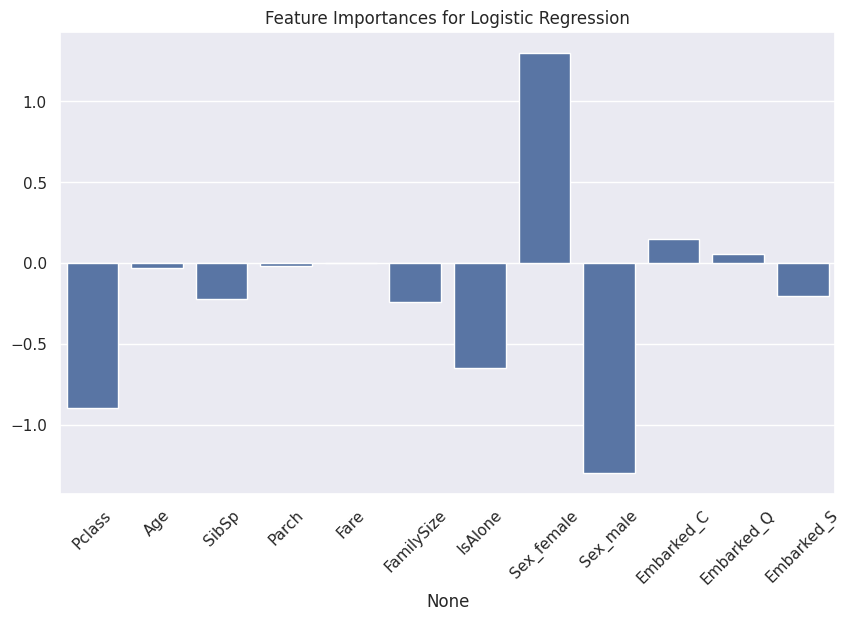

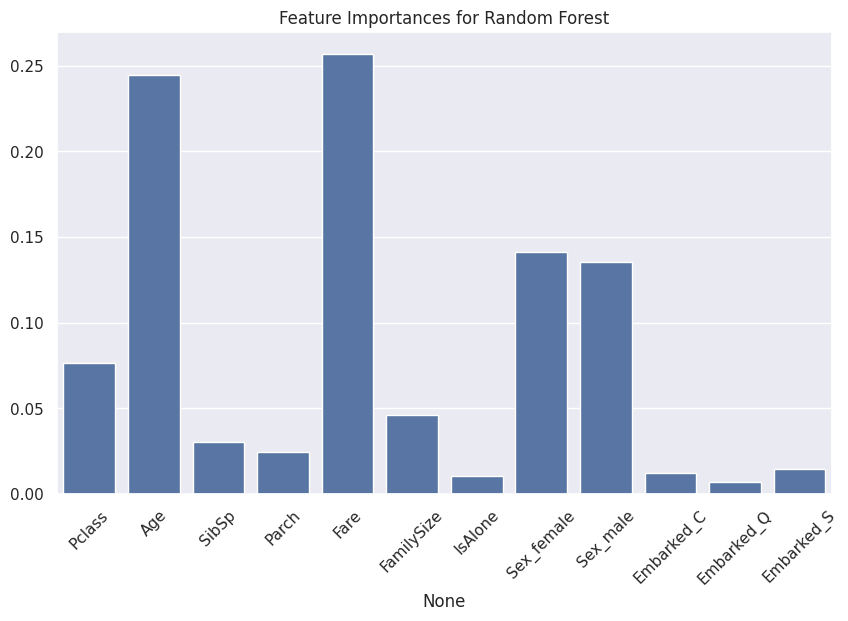

In [37]:
# Plot feature importances
for name, result in results.items():
    feature_importances = result['Feature Importances']
    if isinstance(feature_importances, np.ndarray):
        plt.figure(figsize=(10, 6))
        plt.title(f'Feature Importances for {name}')
        sns.barplot(x=X.columns, y=feature_importances)
        plt.xticks(rotation=45)
        plt.show()
